In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
# Cargamos el df
df = pd.read_csv('estadios.csv', encoding = "ISO-8859-1")

In [3]:
# Revisamos columnas
df.columns

Index(['Direccion', 'USD', 'USDM2', 'SupCubier', 'SupDescub', 'SupTotal',
       'Propiedad', 'BarrioD', 'Equipo450', 'Dummy_450',
       ...
       'H10', 'H11', 'DF', 'DG', 'HubName', 'HubDist', 'USDM2_Estim', 'error',
       'Dist_Estad', 'logusdm2'],
      dtype='object', length=117)

In [4]:
for i in df.columns:
    print(i)

Direccion
USD
USDM2
SupCubier
SupDescub
SupTotal
Propiedad
BarrioD
Equipo450
Dummy_450
Link_2
Hectareas
Densidad
Poblacion
Hogares
Viv_part
Calmat1
Calmat2
Calmat3
Calmat4
Calmat5
Calviv1
Calviv2
Calviv3
Calserv1
Calserv2
Calserv3
Nbino
Nbisi
Equipo_800
Diversidad
Balance
Variedad
Segregacin
Espect_800
Zona_800
Ctos_Sal_R
Dep_Cult_R
Cajeros_R
Escuelas_R
Univ_R
Est_mbus_R
Est_tren_R
Est_subte_R
Est_pmetro_R
MUsd_dto
MUsdm2
MSupdto
Deptos
MUsd_ph
MUsdm2_ph
MSupph
Ph
MUsd_casa
MUsdm2_ca
MSupcasa
Casas
MUsd_lote
MUsdm2_lo
MSuplote
Lotes
MUsd_Prop
MUsdm2_Pr
Musdm2_Is
MSupprop
Propiedade
Isol_Prop
Area
Dummy_Sur
Infra
BS
Balance_R
Variedad_R
Segreg_R
Segreg_R2
Cajeros
C_Salud
Hospitales
Cultura
Escuelas
Universida
Tren
Mbus
Pmetro
Subte
Wifi
CI
Pi1
Pi2
Pi3
Pi4
Pi5
Pi6
Pi7
Pi8
Pi9
Pi10
Pi11
H1
H2
H3
H4
H5
H6
H7
H8
H9
H10
H11
DF
DG
HubName
HubDist
USDM2_Estim
error
Dist_Estad
logusdm2


In [4]:
# Plantamos el primer modelo
y = df['logusdm2']

In [5]:
y1 = df['USDM2']

In [6]:
X1 = df[['SupTotal', 'Densidad', 'Calmat5', 'DF', 'HubDist']]

In [7]:
model = LinearRegression()

In [8]:
X1.fillna(0, inplace=True)

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 5 columns):
SupTotal    1357 non-null float64
Densidad    1357 non-null float64
Calmat5     1357 non-null float64
DF          1357 non-null float64
HubDist     1357 non-null float64
dtypes: float64(5)
memory usage: 53.1 KB


In [10]:
# Fiteamos
model.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predecimos
pred = model.predict(X1)

In [12]:
# Baja capacidad predictiva
r2_score(y1, pred)

0.14133048961855521

In [13]:
# Coeficientes
model.coef_

array([ -5.44137968e-01,   1.11247107e+00,  -1.59421405e+01,
         4.39493004e+02,  -8.77801562e-02])

In [304]:
avPlots(pred, id.n=2, id.cex=0.7)

SyntaxError: keyword can't be an expression (<ipython-input-304-3cb23ed7f831>, line 1)

Supuestos del modelo

In [28]:
import math
print('RMSE:', math.sqrt(686598.432327))

RMSE: 828.612353472358


In [77]:
grafico1 = pd.DataFrame(y1)

In [180]:
grafico1['Usd/m2'] = grafico1['USDM2']

In [181]:
grafico1['Predicciones de M2 usando las variables del modelo'] = pred

In [182]:
grafico1['Usd/m2(log)'] = y

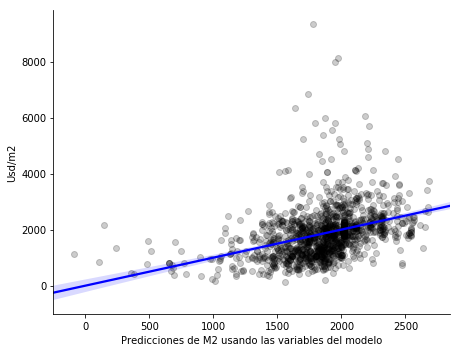

In [183]:
sns.lmplot(x='Predicciones de M2 usando las variables del modelo', y='Usd/m2', aspect=1.3, data = grafico1,
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.2});

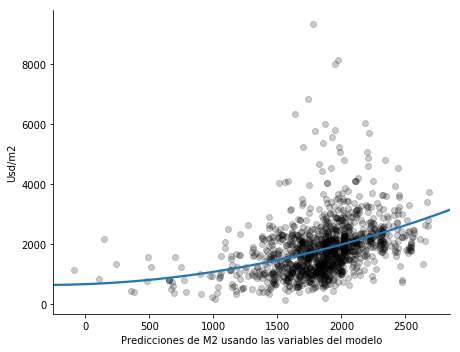

In [185]:
sns.lmplot(x='Predicciones de M2 usando las variables del modelo', y='Usd/m2', aspect=1.3, data = grafico1,
           scatter_kws={'color':'Black','alpha':0.2},order=2, ci=None);

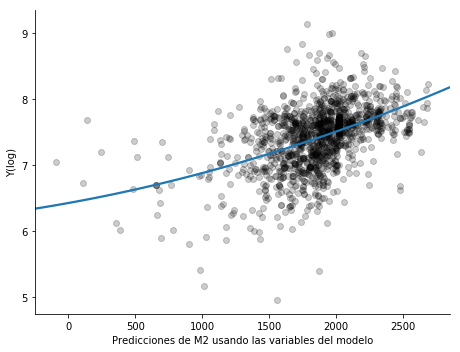

In [179]:
sns.lmplot(x='Predicciones de M2 usando las variables del modelo', y='Y(log)', aspect=1.3, data = grafico1,
           scatter_kws={'color':'Black','alpha':0.2},order=2, ci=None);

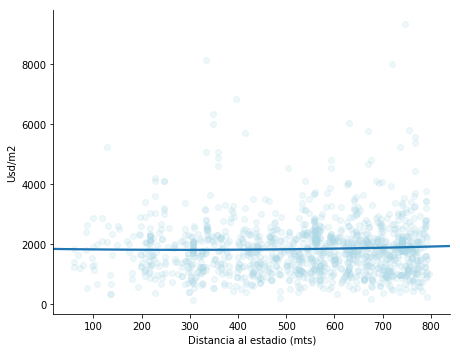

In [234]:
sns.lmplot(x='Distancia al estadio (mts)', y='Usd/m2', aspect=1.3, data = df,
            scatter_kws={'color':'lightblue','alpha':0.2},order=2, ci=None);

In [186]:
df['Superficie Total(m2)'],df['Densidad poblacional (Hab/Ha)'],df['Viviendas deficitarias'],df['Dotacion de servicios urbanos'],df['Distancia al estadio (mts)'], df['Usd/m2']= df['SupTotal'],df['Densidad'],df['Calmat5'],df['DF'],df['HubDist'],df['USDM2']

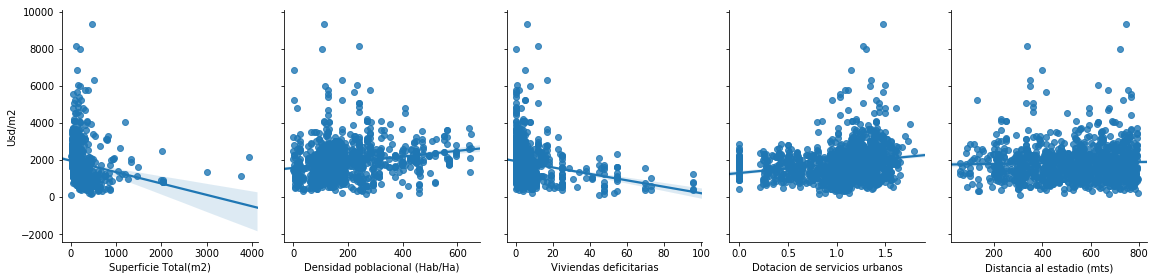

In [192]:
sns.pairplot(df, x_vars=['Superficie Total(m2)', 'Densidad poblacional (Hab/Ha)', 'Viviendas deficitarias', 'Dotacion de servicios urbanos', 'Distancia al estadio (mts)'], y_vars=["Usd/m2"],
             size=4, aspect=0.8, kind="reg");

In [ ]:
'SupTotal', 'Densidad', 'Calmat5', 'DF', 'HubDist'

In [307]:
# Residuos estandarizados del modelo lineal
df['Residuos estandarizados'] = df_er['stderr']

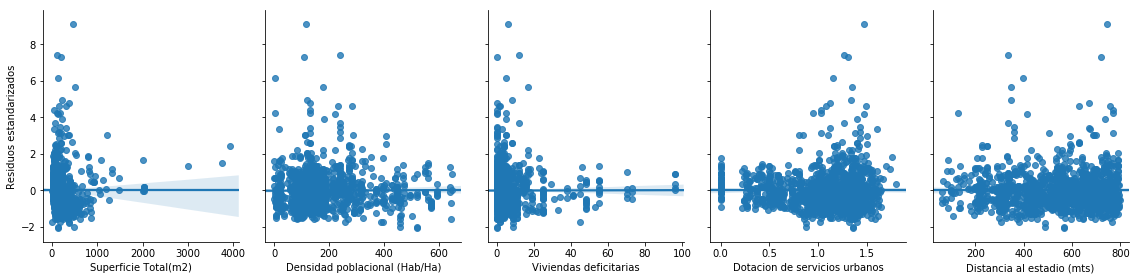

In [308]:
sns.pairplot(df, x_vars=['Superficie Total(m2)', 'Densidad poblacional (Hab/Ha)', 'Viviendas deficitarias', 'Dotacion de servicios urbanos', 'Distancia al estadio (mts)'], y_vars=["Residuos estandarizados"],
             size=4, aspect=0.8, kind="reg");

In [111]:
# Calculamos el error
grafico1['Residuos del modelo'] = grafico1['Valores reales M2 (sin transformación logarítmica)'] - grafico1['Predicciones de M2 usando las variables del modelo']

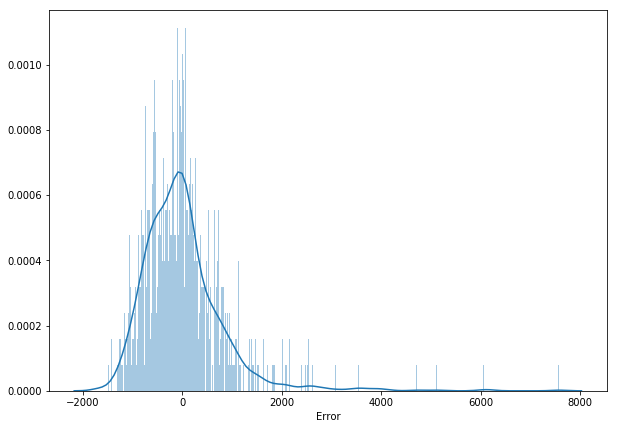

In [102]:
# Lo ploteamos, el histograma presenta un sesgo leve. Puede que el supuesto de homocedasticidad no se cumpla!
plt.figure(figsize=(10,7))
sns.distplot(grafico1['Error'],bins=1000, hist=True, kde=True);

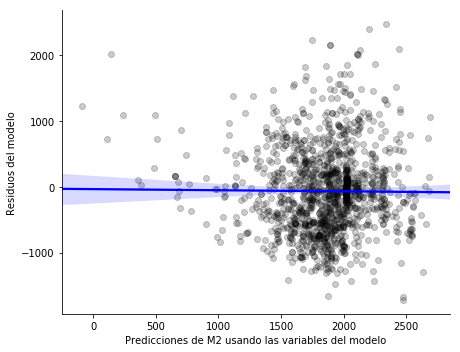

In [321]:
plt.figure(figsize=(10,7))
sns.lmplot(x='Predicciones de M2 usando las variables del modelo', y='Residuos del modelo', aspect=1.3, data = grafico1.loc[grafico1['Residuos del modelo']<2500],
           line_kws={'color':'Blue'}, scatter_kws={'color':'black','alpha':0.2});

In [116]:
q = grafico1.loc[grafico1['Residuos del modelo']<4000]

In [105]:
error = y1 - pred

In [132]:
np.mean(error)

4.4737488093841535e-14

In [305]:
len(error)

1357

# Statmodels

TRANSFORMACION LOGARITMICA

In [238]:
X_stats = sm.add_constant(X1)

In [239]:
est = sm.OLS(y, X_stats)

In [242]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               logusdm2   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     76.26
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.62e-70
Time:                        12:36:01   Log-Likelihood:                -769.38
No. Observations:                1357   AIC:                             1551.
Df Residuals:                    1351   BIC:                             1582.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2406      0.050    144.130      0.0

Text(0.5,0,'Observation Number')

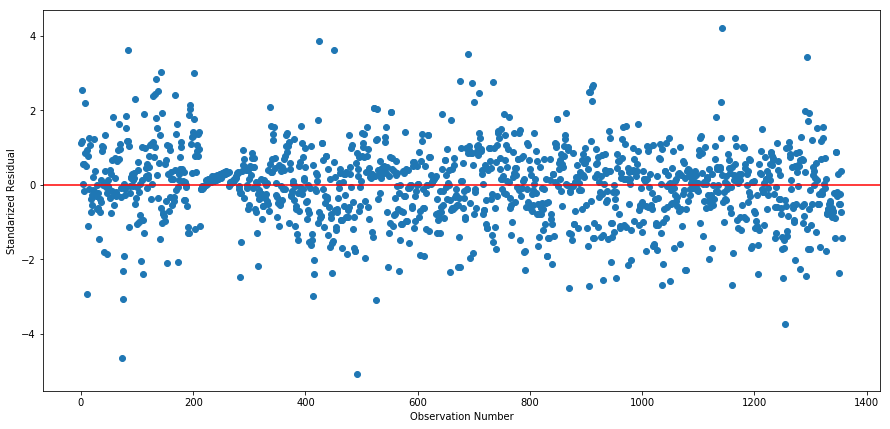

In [253]:
stdres = pd.DataFrame(est2.resid_pearson)
plt.figure(figsize=(15,7))
fig2 = plt.plot(stdres,'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standarized Residual')
plt.xlabel('Observation Number')

In [266]:
len(stdres)

1357

In [267]:
stdres['stderr'] = stdres

In [326]:
len(stdres.loc[stdres['stderr']>2.5])

16

In [327]:
16/1357

0.011790714812085483

MODELO LINEAL

In [254]:
est3 = sm.OLS(y1, X_stats)

In [255]:
est4 = est3.fit()

Text(0.5,0,'Observation Number')

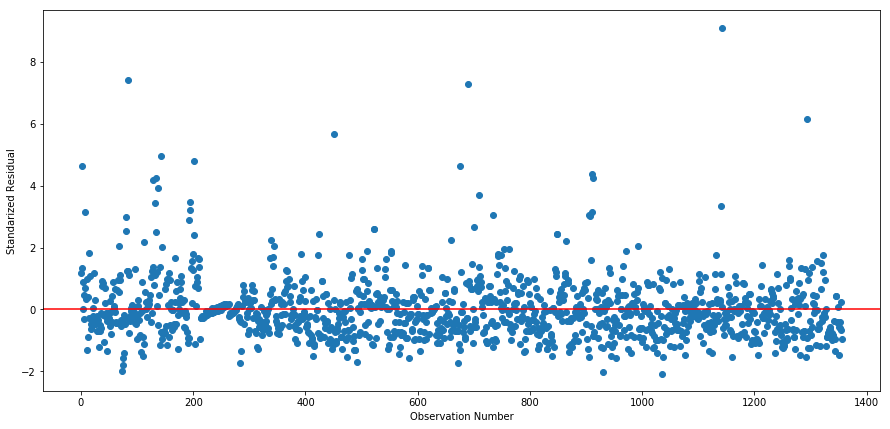

In [256]:
stdres2 = pd.DataFrame(est4.resid_pearson)
plt.figure(figsize=(15,7))
fig3 = plt.plot(stdres2,'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standarized Residual')
plt.xlabel('Observation Number')

In [258]:
len(stdres2)

1357

In [261]:
stdres2['stderr'] = stdres2

In [322]:
len(stdres2.loc[stdres2['stderr']>2])

43

In [323]:
43/1357

0.03168754605747973

In [274]:
stdres2['stderr'].mean()

-1.0745518942834788e-15

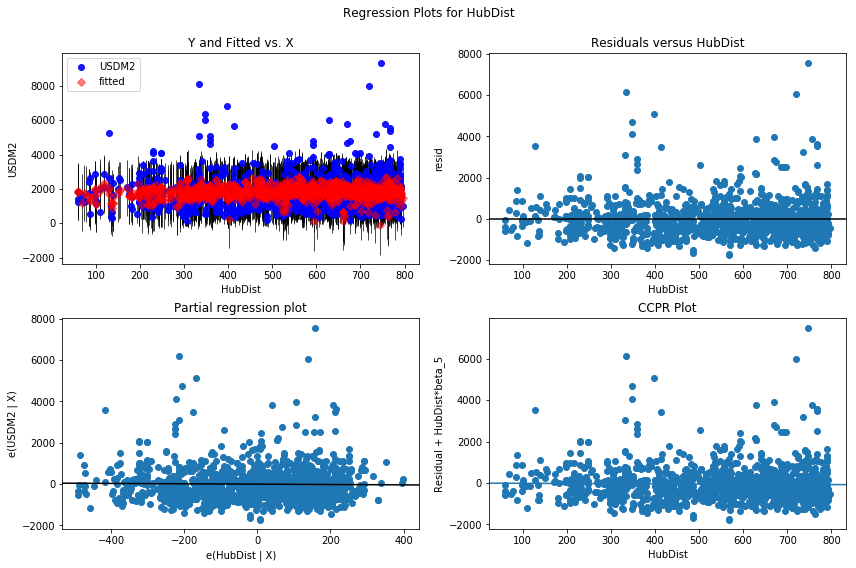

In [309]:
#CLASE COURSERA: https://www.coursera.org/lecture/regression-modeling-practice/python-lesson-5-evaluating-model-fit-pt-2-lGvK9
# plot de diagnostico para el analisis de regresion
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(est4, "HubDist", fig=fig3)

In [282]:
#Leverage plot
#fig4 = sm.graphics.influence_plot(est4, size=8)
#print(fig4)

In [285]:
df_er = X1

In [287]:
df_er['stderr'] = stdres2['stderr']

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


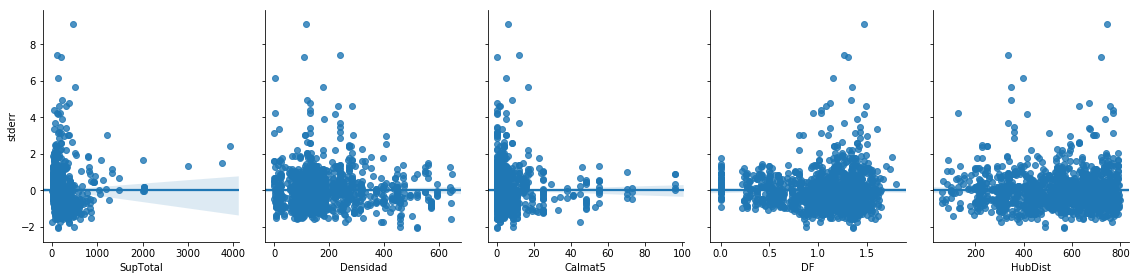

In [296]:
sns.pairplot(df_er, x_vars=['SupTotal', 'Densidad', 'Calmat5', 'DF', 'HubDist'], y_vars=["stderr"],
             size=4, aspect=0.8, kind="reg");

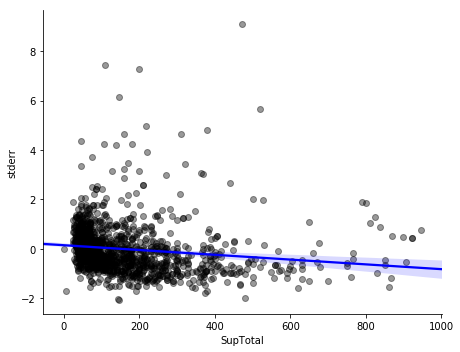

In [297]:
plt.figure(figsize=(10,7))
sns.lmplot(x='SupTotal', y='stderr', aspect=1.3, data = df_er.loc[df_er['SupTotal']<1000],
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.4});

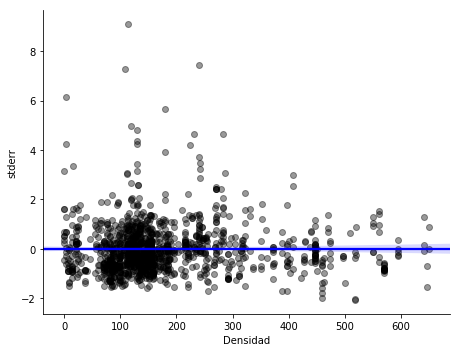

In [298]:
plt.figure(figsize=(10,7))
sns.lmplot(x='Densidad', y='stderr', aspect=1.3, data = df_er,
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.4});

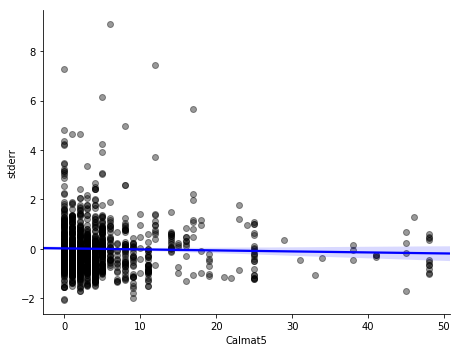

In [299]:
plt.figure(figsize=(10,7))
sns.lmplot(x='Calmat5', y='stderr', aspect=1.3, data = df_er.loc[df_er['Calmat5']<50],
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.4});

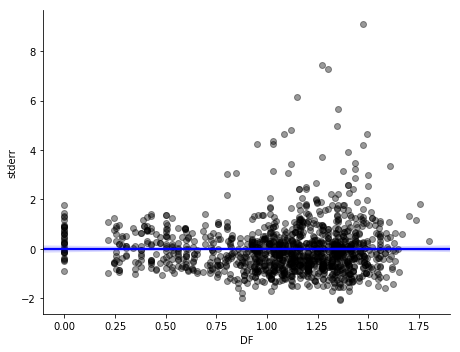

In [300]:
plt.figure(figsize=(10,7))
sns.lmplot(x='DF', y='stderr', aspect=1.3, data = df_er,
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.4});

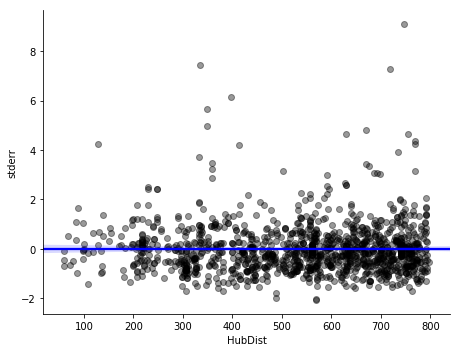

In [301]:
plt.figure(figsize=(10,7))
sns.lmplot(x='HubDist', y='stderr', aspect=1.3, data = df_er,
           line_kws={'color':'Blue'}, scatter_kws={'color':'Black','alpha':0.4});

In [291]:
df_er

,SupTotal,Densidad,Calmat5,DF,HubDist,stderr
0,255.0,85.0,0.0,1.736297,747.874178,1.180274
1,287.0,227.7,1.0,1.699398,678.821787,1.344090
2,159.0,231.9,1.0,1.494864,629.437126,4.642139
3,27.0,650.0,1.0,1.410998,757.875895,0.886170
4,67.0,650.0,1.0,1.410998,757.875895,0.008423
5,30.0,150.6,2.0,1.098844,785.656940,0.451101
6,108.0,3.7,5.0,1.132416,572.717815,-0.309459
7,42.0,239.6,12.0,1.136917,478.687097,0.679807
8,128.0,0.0,0.0,1.377820,502.945509,3.147796
9,80.0,0.0,0.0,1.377820,592.105984,0.348662


In [333]:
df.iloc[:,1:15]

,USD,USDM2,SupCubier,SupDescub,SupTotal,Propiedad,BarrioD,Equipo450,Dummy_450,Link_2,Hectareas,Densidad,Poblacion,Hogares
0,780000,3058.823529,245.0,10.0,255.0,Departamento,Belgrano,NaN,0,20140108.0,11.2,85.0,952.0,299.0
1,950000,3310.104530,267.0,20.0,287.0,Departamento,Belgrano,NaN,0,20132205.0,5.2,227.7,1184.0,394.0
2,960000,6037.735849,149.0,10.0,159.0,Departamento,Belgrano,NaN,0,20131311.0,2.6,231.9,603.0,215.0
3,92000,3407.407407,27.0,0.0,27.0,Departamento,Belgrano,NaN,0,20131008.0,1.4,650.0,910.0,432.0
4,178000,2656.716418,67.0,0.0,67.0,Departamento,Belgrano,NaN,0,20131008.0,1.4,650.0,910.0,432.0
5,70000,2333.333333,30.0,0.0,30.0,Departamento,Nu±ez,NaN,0,20130305.0,5.3,150.6,798.0,312.0
6,160000,1481.481481,68.0,40.0,108.0,Depto tipo casa,Nu±ez,NaN,0,20130302.0,176.0,3.7,654.0,270.0
7,105000,2500.000000,38.0,4.0,42.0,Departamento,Belgrano,Defensores de Belgrano,1,20130210.0,4.6,239.6,1102.0,468.0
8,580000,4531.250000,128.0,0.0,128.0,Departamento,Nu±ez,NaN,0,NaN,NaN,NaN,NaN,NaN
9,178000,2225.000000,80.0,0.0,80.0,Depto tipo casa,Nu±ez,NaN,0,NaN,NaN,NaN,NaN,NaN
